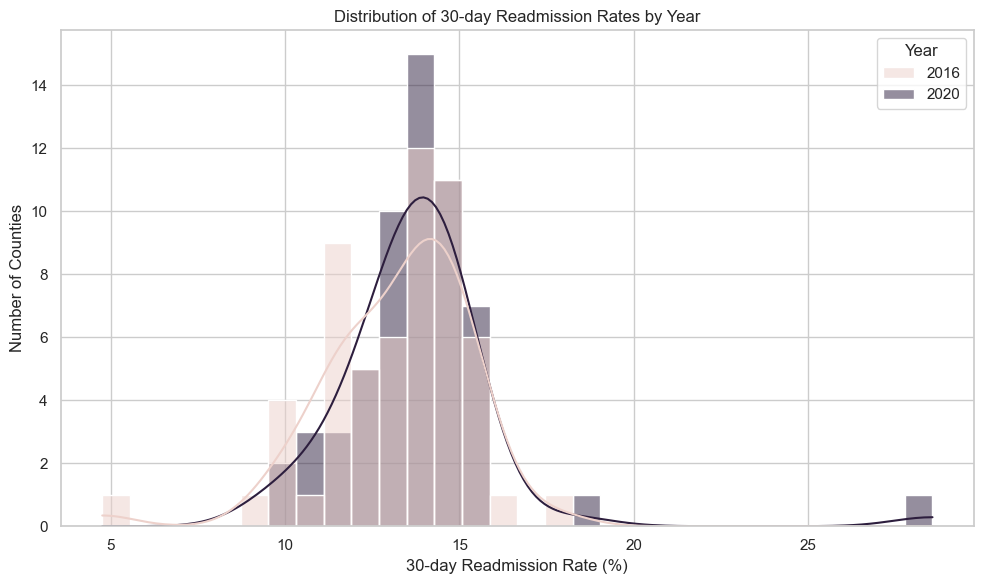

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset based on the PDF content
cleaned_primary_path = "../data/cleaned_data/primary.csv"
presidential_path = "../data/cleaned_data/presidentialResult.csv"

cleaned_primary = pd.read_csv(cleaned_primary_path)
presidential = pd.read_csv(presidential_path)

# Ensure correct data types
cleaned_primary['30_day_Readmission_Rate'] = cleaned_primary['30_day_Readmission_Rate'].astype(float)
cleaned_primary['Total_Admits'] = cleaned_primary['Total_Admits'].astype(int)
cleaned_primary['30_day_Readmits'] = cleaned_primary['30_day_Readmits'].astype(int)

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Distribution of 30-day Readmission Rate by Year
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_primary, x="30_day_Readmission_Rate", hue="Year", bins=30, kde=True)
plt.title("Distribution of 30-day Readmission Rates by Year")
plt.xlabel("30-day Readmission Rate (%)")
plt.ylabel("Number of Counties")
plt.tight_layout()
plt.show()


In [14]:
summary_stats = cleaned_primary.groupby("Year")[[
    "Total_Admits", "30_day_Readmits", "30_day_Readmission_Rate"
]].describe().round(2)

# Displaying the summary statistics using standard Pandas table formatting for cleaner output
summary_stats.transpose()



Year                                2016       2020
Total_Admits            count      58.00      58.00
                        mean    31753.72   26899.05
                        std     70410.23   56908.57
                        min        21.00       7.00
                        25%      2827.50    2525.00
                        50%      9188.00    7944.50
                        75%     29817.75   26083.00
                        max    493868.00  391234.00
30_day_Readmits         count      58.00      58.00
                        mean     4611.31    3872.74
                        std     10905.29    8497.49
                        min         1.00       2.00
                        25%       392.50     354.25
                        50%      1184.50    1053.50
                        75%      4135.50    3797.25
                        max     77874.00   59374.00
30_day_Readmission_Rate count      58.00      58.00
                        mean       13.22      13.82
                        std         2.10       2.51
                        min         4.76       9.54
                        25%        11.82      12.71
                        50%        13.62      13.92
                        75%        14.54      14.52
                        max        17.82      28.57

<Figure size 1000x600 with 0 Axes>

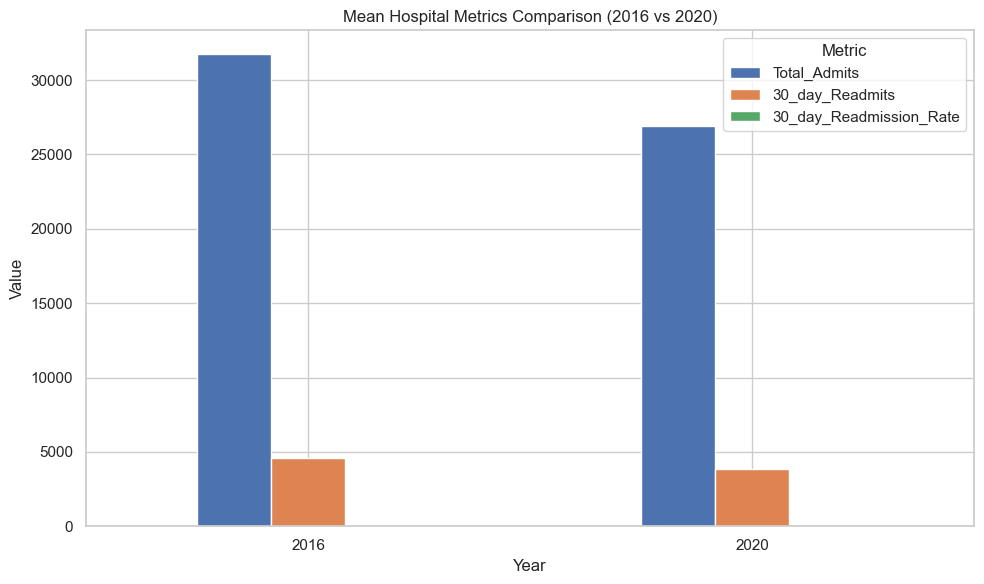

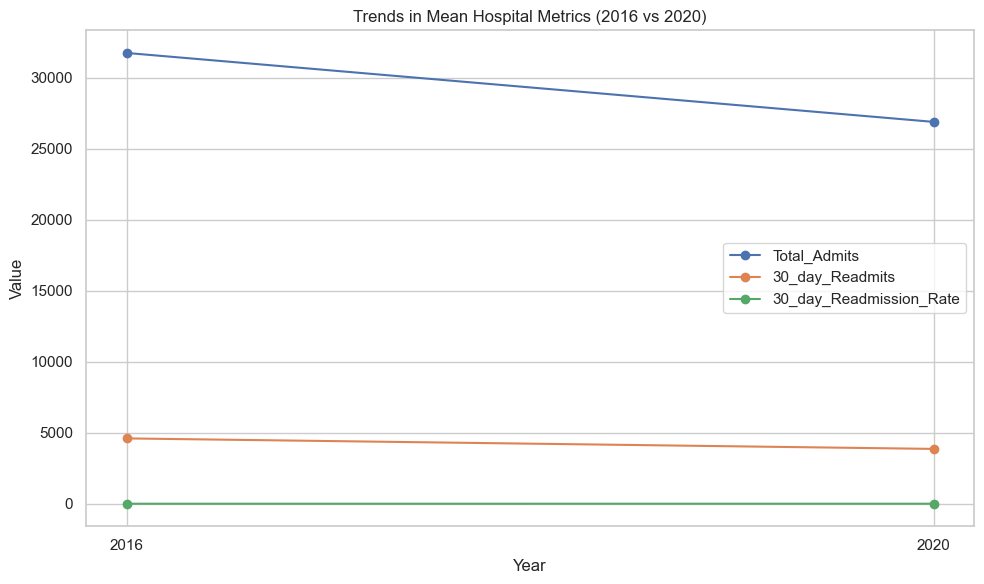

In [15]:
# Prepare data for plotting
mean_stats = {
    "Year": ["2016", "2020"],
    "Total_Admits": [31753.72, 26899.05],
    "30_day_Readmits": [4611.31, 3872.74],
    "30_day_Readmission_Rate": [13.22, 13.82]
}

mean_df = pd.DataFrame(mean_stats)

# Bar Chart: Mean Values Comparison
plt.figure(figsize=(10, 6))
mean_df.set_index("Year")[["Total_Admits", "30_day_Readmits", "30_day_Readmission_Rate"]].plot(kind='bar', figsize=(10, 6))
plt.title("Mean Hospital Metrics Comparison (2016 vs 2020)")
plt.ylabel("Value")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# Line Chart: Mean Values Trend
plt.figure(figsize=(10, 6))
for col in ["Total_Admits", "30_day_Readmits", "30_day_Readmission_Rate"]:
    plt.plot(mean_df["Year"], mean_df[col], marker='o', label=col)

plt.title("Trends in Mean Hospital Metrics (2016 vs 2020)")
plt.ylabel("Value")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
